In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

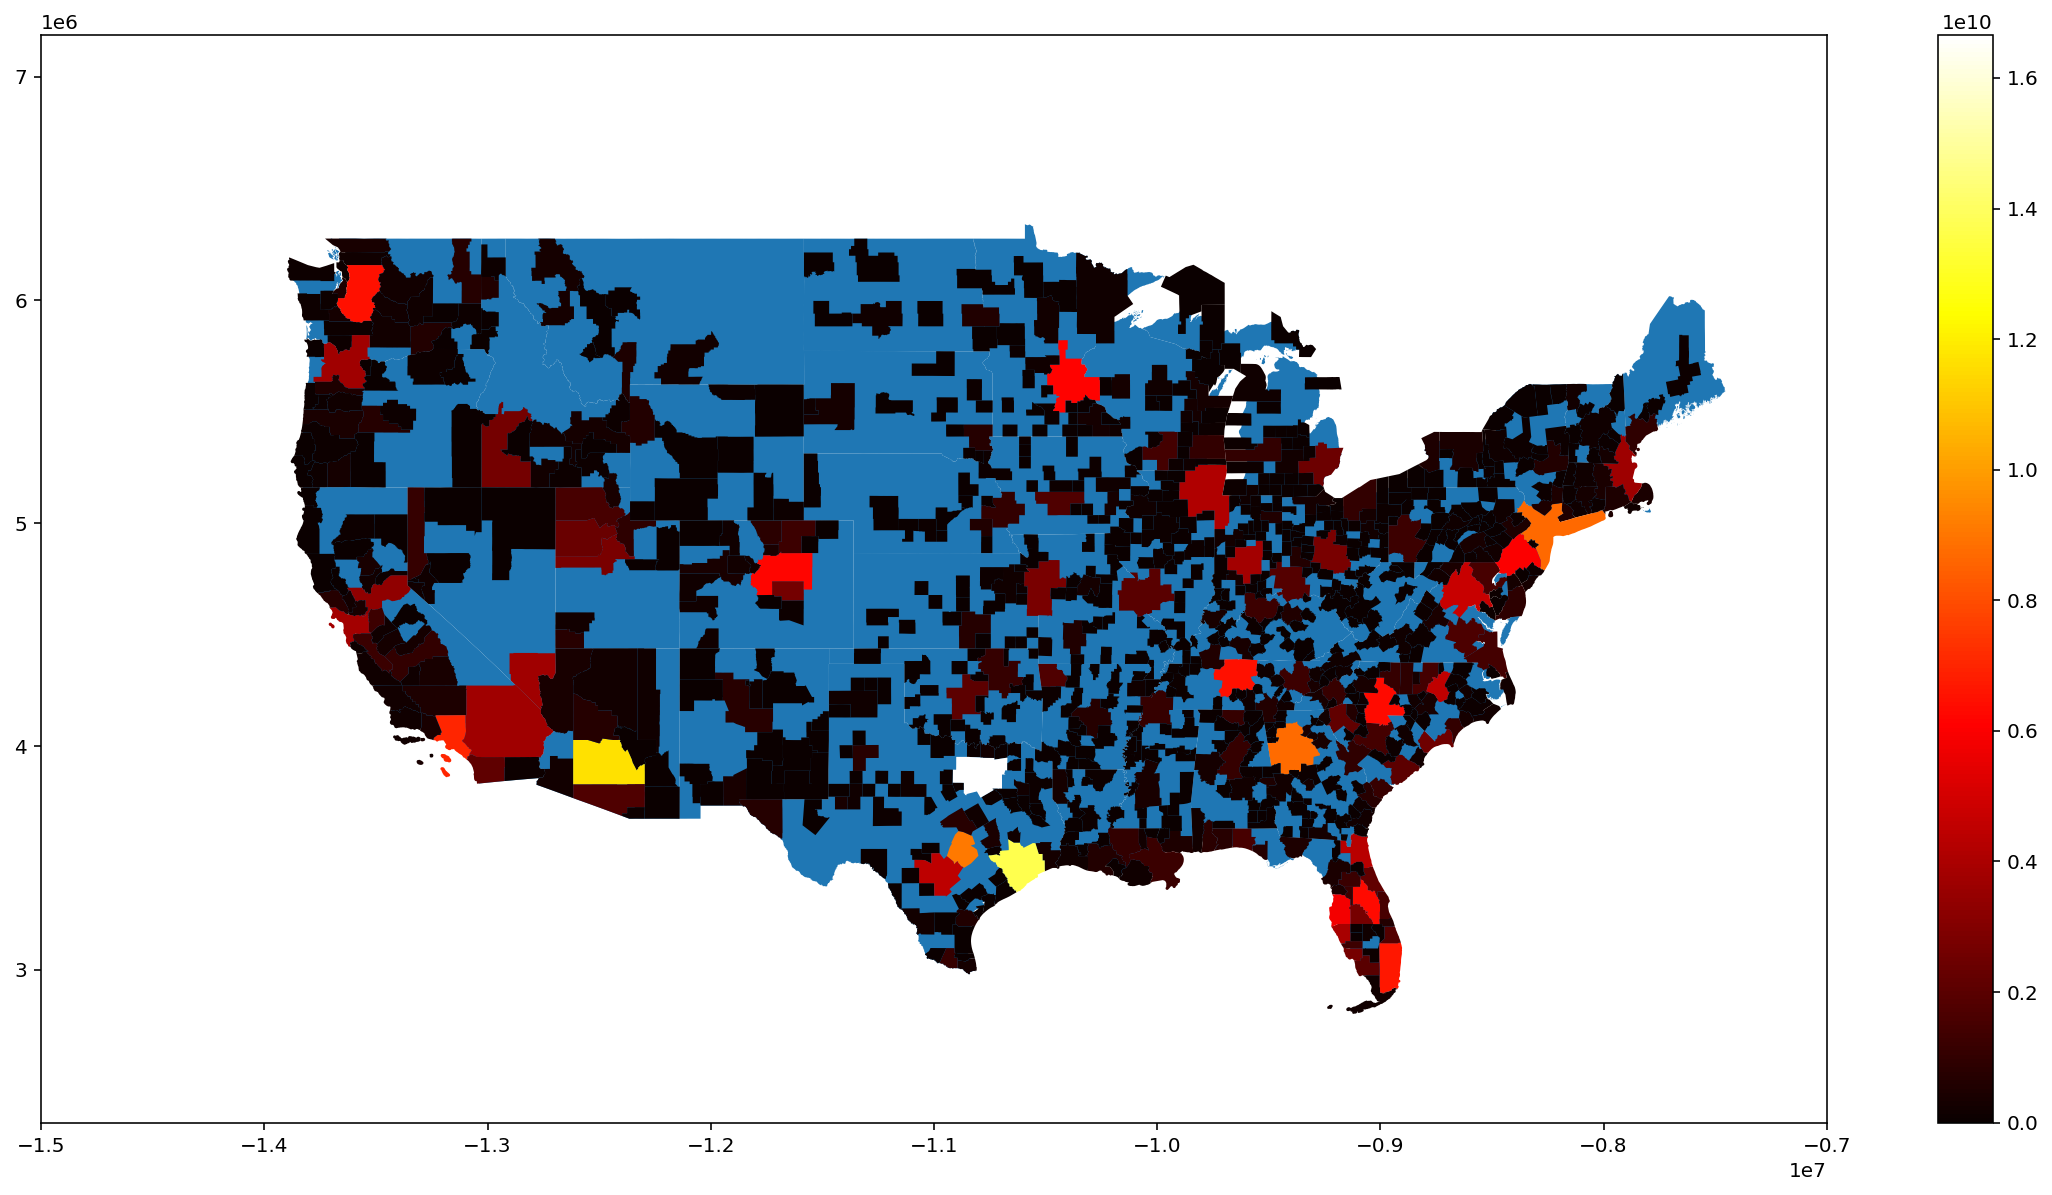

In [3]:
ax = plotUS()
df21.plot(ax=ax, column='Tot_Bldgs_Value', legend=True, cmap='hot');

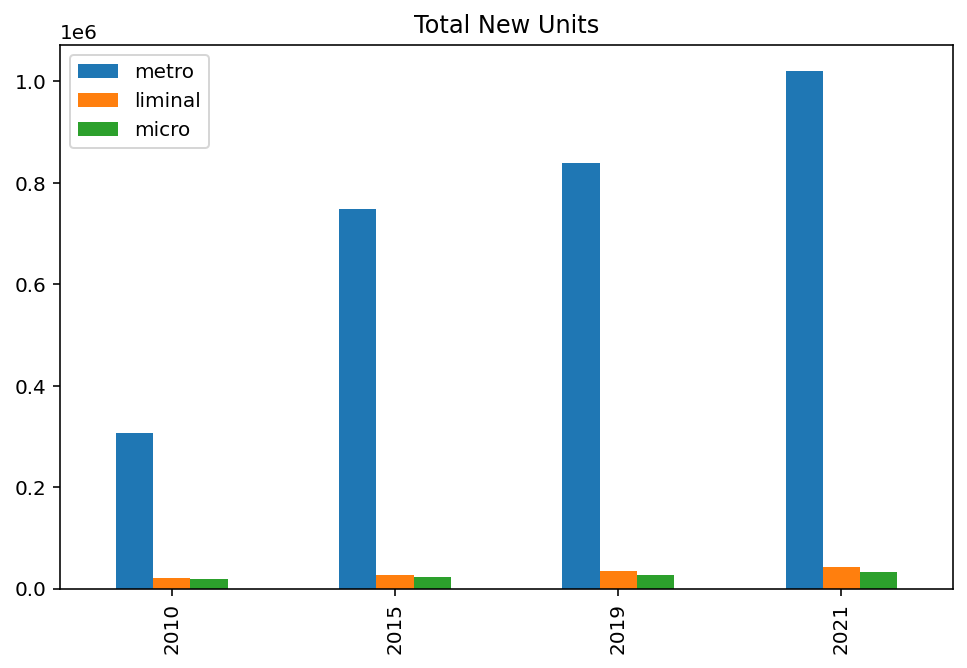

In [4]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal

df = pd.DataFrame()
df.loc[2010, 'metro'] = df10[metro]['Tot_Units'].sum()
df.loc[2010, 'liminal'] = df10[liminal]['Tot_Units'].sum()
df.loc[2010, 'micro'] = df10[notLim]['Tot_Units'].sum()
df.loc[2015, 'metro'] = df15[metro]['Tot_Units'].sum()
df.loc[2015, 'liminal'] = df15[liminal]['Tot_Units'].sum()
df.loc[2015, 'micro'] = df15[notLim]['Tot_Units'].sum()
df.loc[2019, 'metro'] = df19[metro]['Tot_Units'].sum()
df.loc[2019, 'liminal'] = df19[liminal]['Tot_Units'].sum()
df.loc[2019, 'micro'] = df19[notLim]['Tot_Units'].sum()
df.loc[2021, 'metro'] = df21[metro]['Tot_Units'].sum()
df.loc[2021, 'liminal'] = df21[liminal]['Tot_Units'].sum()
df.loc[2021, 'micro'] = df21[notLim]['Tot_Units'].sum()
df.plot(kind='bar', figsize=(8, 5))
plt.title("Total New Units");

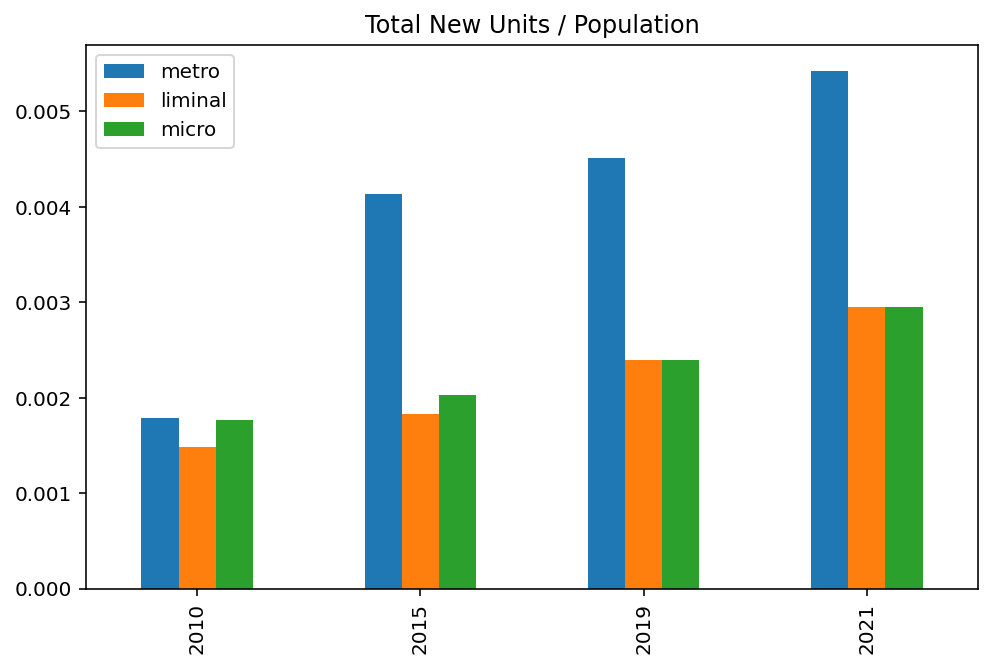

In [5]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal

df = pd.DataFrame()
df.loc[2010, 'metro'] = df10[metro]['Tot_Units'].sum() / df10[metro]['POPESTIMATE'].sum()
df.loc[2010, 'liminal'] = df10[liminal]['Tot_Units'].sum() / df10[liminal]['POPESTIMATE'].sum()
df.loc[2010, 'micro'] = df10[notLim]['Tot_Units'].sum() / df10[notLim]['POPESTIMATE'].sum()
df.loc[2015, 'metro'] = df15[metro]['Tot_Units'].sum() / df15[metro]['POPESTIMATE'].sum()
df.loc[2015, 'liminal'] = df15[liminal]['Tot_Units'].sum() / df15[liminal]['POPESTIMATE'].sum()
df.loc[2015, 'micro'] = df15[notLim]['Tot_Units'].sum() / df15[notLim]['POPESTIMATE'].sum()
df.loc[2019, 'metro'] = df19[metro]['Tot_Units'].sum() / df19[metro]['POPESTIMATE'].sum()
df.loc[2019, 'liminal'] = df19[liminal]['Tot_Units'].sum() / df19[liminal]['POPESTIMATE'].sum()
df.loc[2019, 'micro'] = df19[notLim]['Tot_Units'].sum() / df19[notLim]['POPESTIMATE'].sum()
df.loc[2021, 'metro'] = df21[metro]['Tot_Units'].sum() / df21[metro]['POPESTIMATE'].sum()
df.loc[2021, 'liminal'] = df21[liminal]['Tot_Units'].sum() / df21[liminal]['POPESTIMATE'].sum()
df.loc[2021, 'micro'] = df21[notLim]['Tot_Units'].sum() / df21[notLim]['POPESTIMATE'].sum()
df.plot(kind='bar', figsize=(8, 5))
plt.title("Total New Units / Population");

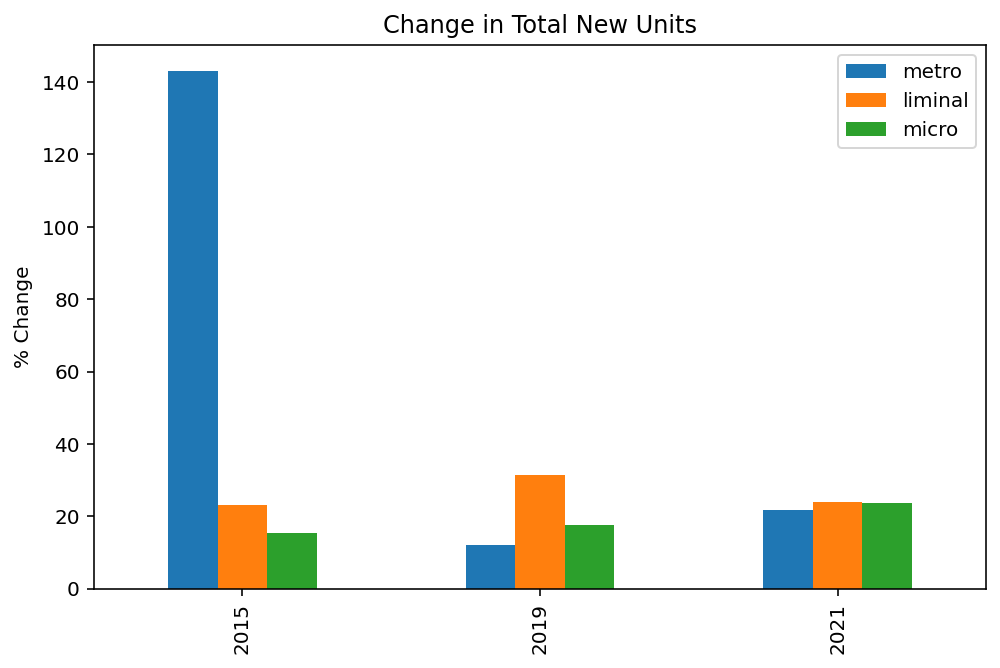

In [6]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal

df = pd.DataFrame()
df.loc[2015, 'metro'] = (df15[metro]['Tot_Units'].sum() - df10[metro]['Tot_Units'].sum()) / df10[metro]['Tot_Units'].sum() * 100
df.loc[2015, 'liminal'] = (df15[liminal]['Tot_Units'].sum() - df10[liminal]['Tot_Units'].sum()) /df10[liminal]['Tot_Units'].sum() * 100
df.loc[2015, 'micro'] = (df15[notLim]['Tot_Units'].sum() - df10[notLim]['Tot_Units'].sum()) / df10[notLim]['Tot_Units'].sum() * 100
df.loc[2019, 'metro'] = (df19[metro]['Tot_Units'].sum() - df15[metro]['Tot_Units'].sum()) / df15[metro]['Tot_Units'].sum() * 100
df.loc[2019, 'liminal'] = (df19[liminal]['Tot_Units'].sum() - df15[liminal]['Tot_Units'].sum()) / df15[liminal]['Tot_Units'].sum() * 100
df.loc[2019, 'micro'] = (df19[notLim]['Tot_Units'].sum() - df15[notLim]['Tot_Units'].sum()) / df15[notLim]['Tot_Units'].sum() * 100
df.loc[2021, 'metro'] = (df21[metro]['Tot_Units'].sum() - df19[metro]['Tot_Units'].sum()) / df19[metro]['Tot_Units'].sum() * 100
df.loc[2021, 'liminal'] = (df21[liminal]['Tot_Units'].sum() - df19[liminal]['Tot_Units'].sum()) / df19[liminal]['Tot_Units'].sum() * 100
df.loc[2021, 'micro'] = (df21[notLim]['Tot_Units'].sum() - df19[notLim]['Tot_Units'].sum()) / df19[notLim]['Tot_Units'].sum() * 100
df.plot(kind='bar', figsize=(8, 5))
plt.ylabel("% Change")
plt.title("Change in Total New Units");